PART 3

Q5: Eigenfaces Generation (3 marks)
Generate and visualize the first (top) 10 eigenfaces of the classic vision dataset LFW.
WORKFLOW :
1. Load the dataset from sklearn and visualize 10 original images from it. (You may load with
min_faces_per_person=500). The output should be similar to the following :
(HINT: Use the images component of the loaded dataset)
2. Apply PCA on the corresponding flattened array with your choice for the appropriate number of
components.
3. Visualize the first 10 principal components by reshaping them. The output should be similar to the
following :
Q6: PCA RECONSTRUCTION (3 marks)
Transform a sample of 5 images to the PCA space and reconstruct them back using the inverse
transformation. Visualize original and reconstructed images side by side
WORKFLOW :
1. Transform any set of 5 randomly chosen images (flattened array) using PCA
2. Inverse transform the images, reshape, and visualize. The output should be similar to the
following :


In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

In [16]:
lfw = fetch_lfw_people(min_faces_per_person=500 , resize=0.4)

X = lfw.data

images = lfw.images

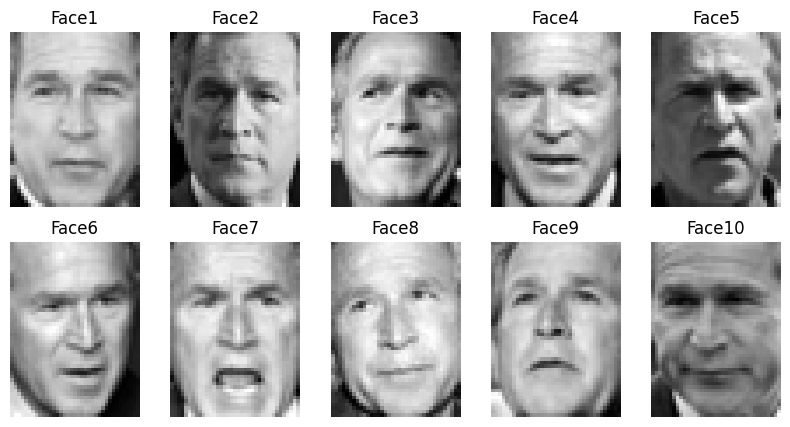

In [17]:
# faces = fetch_olivetti_faces()
# images = faces.images

fig,axes = plt.subplots(2,5,figsize=(10,5))

for i,ax in enumerate(axes.flat):
    ax.imshow(images[i] , cmap = "gray")
    ax.set_title(f"Face{i+1}")
    ax.axis("off")

In [26]:
len(X[0])

1850

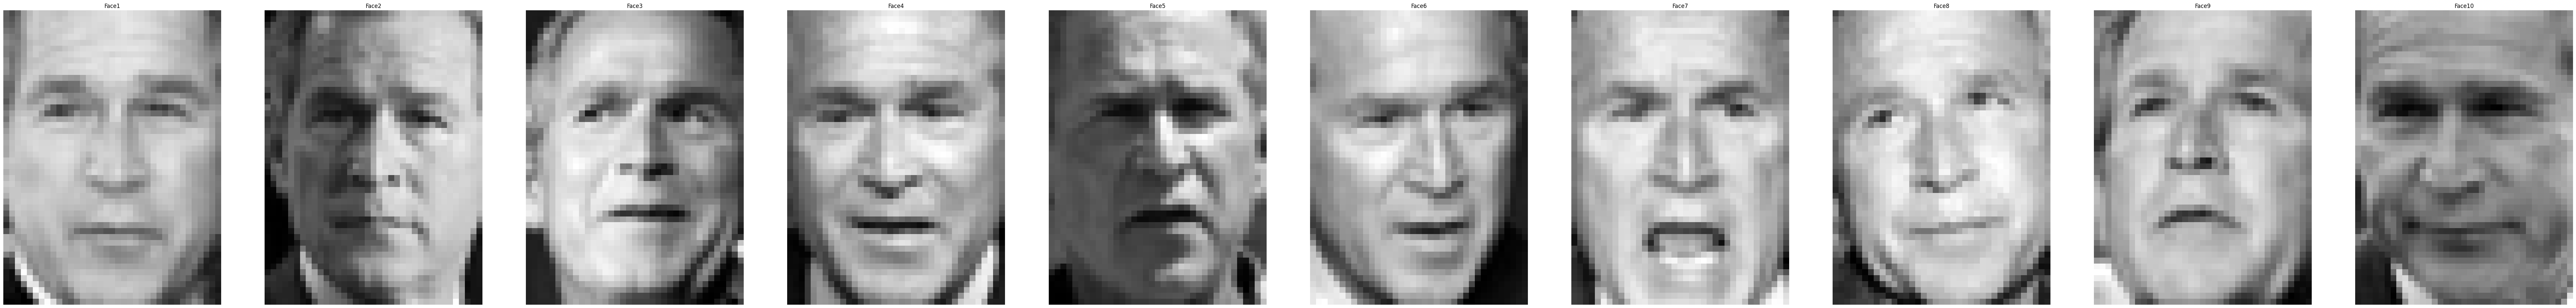

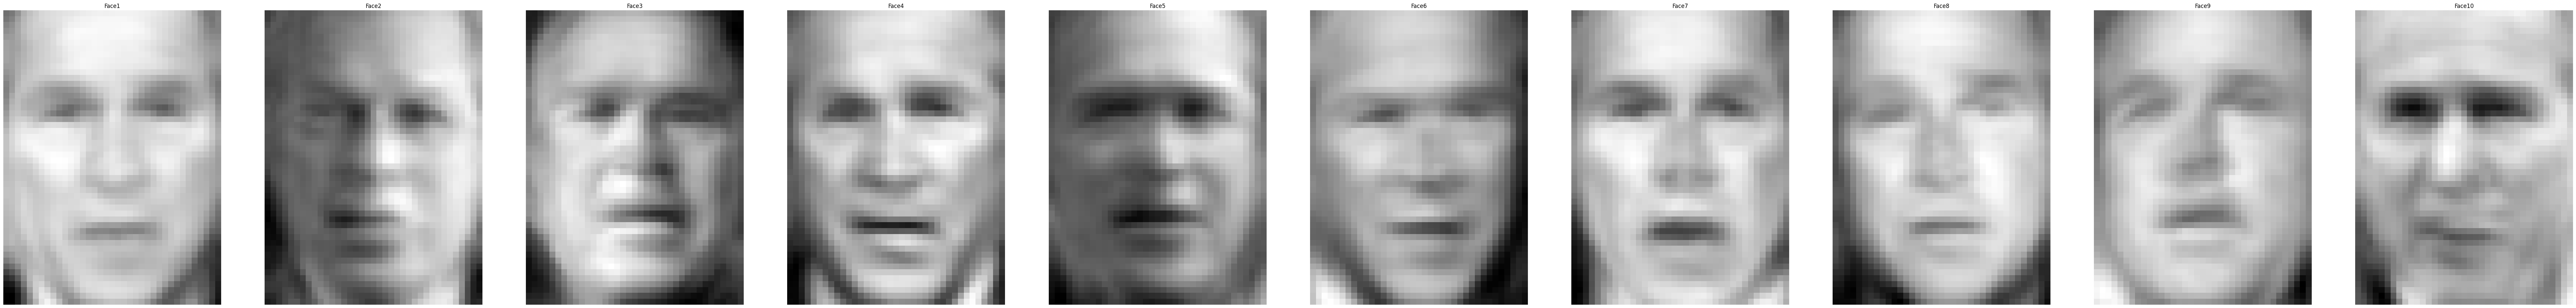

In [40]:
from sklearn.feature_extraction import image
pca = PCA(n_components=25).fit(X)

principal_components = pca.components_
sample = X[:10]
X_pca = pca.transform(sample)
X_r = pca.inverse_transform(X_pca)



# patches = image.extract_patches_2d(X, (25, 25))
# principal_components = pca.components_fig,axes = plt.subplots(2,5,figsize=(10,5))

fig,axes = plt.subplots(1,10,figsize=(100,50))

for i,ax in enumerate(axes.flat):
    ax.imshow(images[i] , cmap = "gray")
    ax.set_title(f"Face{i+1}")
    ax.axis("off")
    
fig,axes = plt.subplots(1,10,figsize=(100,50))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_r[i].reshape(50,37) , cmap = "gray")
    ax.set_title(f"Face{i+1}")
    ax.axis("off")

In [24]:
X

array([[0.44183007, 0.38039216, 0.44836602, ..., 0.3281046 , 0.30588236,
        0.25490198],
       [0.01045752, 0.06143791, 0.22352941, ..., 0.14117648, 0.07712419,
        0.075817  ],
       [0.11895425, 0.11895425, 0.11633987, ..., 0.07843138, 0.04052288,
        0.2248366 ],
       ...,
       [0.2888889 , 0.31633988, 0.33071896, ..., 0.42091504, 0.2248366 ,
        0.2130719 ],
       [0.40261438, 0.4039216 , 0.39084968, ..., 0.95032686, 0.9124183 ,
        0.8901961 ],
       [0.00392157, 0.00915033, 0.01437909, ..., 0.27189544, 0.19477125,
        0.03137255]], dtype=float32)

In [19]:
sample = X[:5]

X_pca = pca.transform(sample)

In [28]:
X_pca

array([[ 5.19136810e+00, -1.54981613e-01,  4.92600709e-01,
        -6.64656878e-01,  3.94015431e-01, -2.16022253e-01,
        -1.79069132e-01, -1.39886940e+00, -1.63431525e-01,
        -1.29794776e-01,  9.66712236e-02, -6.43337905e-01,
         1.49726152e-01, -3.85685742e-01, -2.97023892e-01,
         2.92613208e-01,  6.84591830e-02,  2.91232258e-01,
        -5.09079218e-01,  4.67256963e-01,  2.67180204e-02,
         1.24925055e-01,  1.33013383e-01, -2.03554511e-01,
         7.35637024e-02],
       [-3.92316818e+00,  7.11635971e+00,  1.57305747e-01,
        -2.22755575e+00, -6.74756885e-01, -1.74865699e+00,
         3.40553433e-01, -1.87709689e+00,  1.57585132e+00,
        -5.04672825e-01, -5.60254812e-01,  9.45220649e-01,
         2.36591771e-01,  7.35013336e-02,  5.97534060e-01,
        -1.63996983e+00, -4.72599715e-01, -4.84274775e-01,
         7.06639886e-03, -1.52003396e+00, -2.00555205e-01,
         3.73619020e-01, -7.85896555e-02, -8.87279153e-01,
         8.28055441e-02],
    

In [20]:
X_reconstructed = pca.inverse_transform(X_pca)

In [21]:
X_reconstructed 

array([[0.42627868, 0.4505979 , 0.5133128 , ..., 0.3776336 , 0.2832816 ,
        0.18270956],
       [0.1502004 , 0.20436007, 0.26089334, ..., 0.19825041, 0.06549188,
        0.08019653],
       [0.12162548, 0.11756164, 0.15390456, ..., 0.12839192, 0.1331428 ,
        0.18488328],
       [0.24346516, 0.2692787 , 0.30064178, ..., 0.31673288, 0.18240789,
        0.10830575],
       [0.16794842, 0.17381269, 0.20895468, ..., 0.389838  , 0.44257408,
        0.52726066]], dtype=float32)

PART 1

Q1: PCA using Eigenvalue Decomposition (EVD)
Given a dataset(healthcare_dataset.csv) in CSV format, write a Python program to perform Principal
Component Analysis (PCA) using the Eigenvalue Decomposition approach. Your code should:
1. Load the dataset and keep only numeric columns.
2. Center the data by subtracting the mean of each feature.[0.5]
3. Compute the covariance matrix and perform eigenvalue decomposition.[0.25]
4. Sort the eigenvalues and eigenvectors in descending order.[0.25]
5. Print the top 2 eigenvalues, explained variance ratio, and execution time for the PCA process.[1]

In [ ]:
import pandas as pd
df = pd.read_csv('healthcare_dataset.csv')